## Simple Return, Log Return & Volatility Analysis

In this session, I conducted an analysis of Apple’s stock performance using various measures of returns and volatility. The key components of the analysis included plotting the stock price, examining the distribution of returns (both simple and log returns), and calculating return volatility. Here’s a breakdown of each item:

---


##### 1. Stock Price Plot:

Provides a visual overview of Apple’s price movements over the chosen period.
Highlights trends, peaks, and troughs, helping to identify significant price shifts and overall market direction.


##### 2. Return Distribution (Simple Returns):

Calculated as the percentage change between consecutive prices.
The histogram shows the frequency of different daily return levels, illustrating the spread and skewness of Apple’s daily returns.
Useful for understanding the stock's day-to-day volatility and potential for gains or losses.


##### 3. Log Return Distribution:

Calculated as the natural logarithm of the ratio of consecutive prices, often preferred for financial analysis due to its statistical properties.
The log returns histogram provides a more symmetrical distribution, suitable for modeling and comparing risks.
Helps in assessing price behavior under a continuously compounding return assumption.


##### 4. Volatility of Simple Returns:

Calculated as the 20-day rolling standard deviation of daily returns, annualized to show yearly volatility.
Visualizes periods of high or low volatility, with peaks indicating turbulent market conditions and troughs indicating stability.
Useful for gauging the overall risk associated with Apple’s price fluctuations over time.


##### 5. Volatility of Log Returns:

Similar to simple returns volatility but calculated on log returns.
Log return volatility is often used for risk modeling due to its more stable distribution over time.
Offers insight into periods of intensified risk or stability in the stock’s performance.

### Package Loading

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### Fetch Data

In [ ]:
# Fetch historical data for Apple (AAPL)
ticker = 'AAPL'
start_date = "2023-01-01"
end_date = "2024-10-31"
data = yf.download(ticker, start=start_date, end=end_date)['Close']

### Calculate Daily Return, Log Return,Annualized volatility and Annualized Log volatility

In [12]:
simple_returns = data.pct_change()  # Simple returns
log_returns = np.log(data/data.shift(1)) #Logarithmic returns

simple_volatility = simple_returns.rolling(window=20).std() * np.sqrt(252)  # Annualized 20-day volatility
log_volatility = log_returns.rolling(window=20).std() * np.sqrt(252)  # Annualized volatility

###  Plot

#### Apple Price Plot

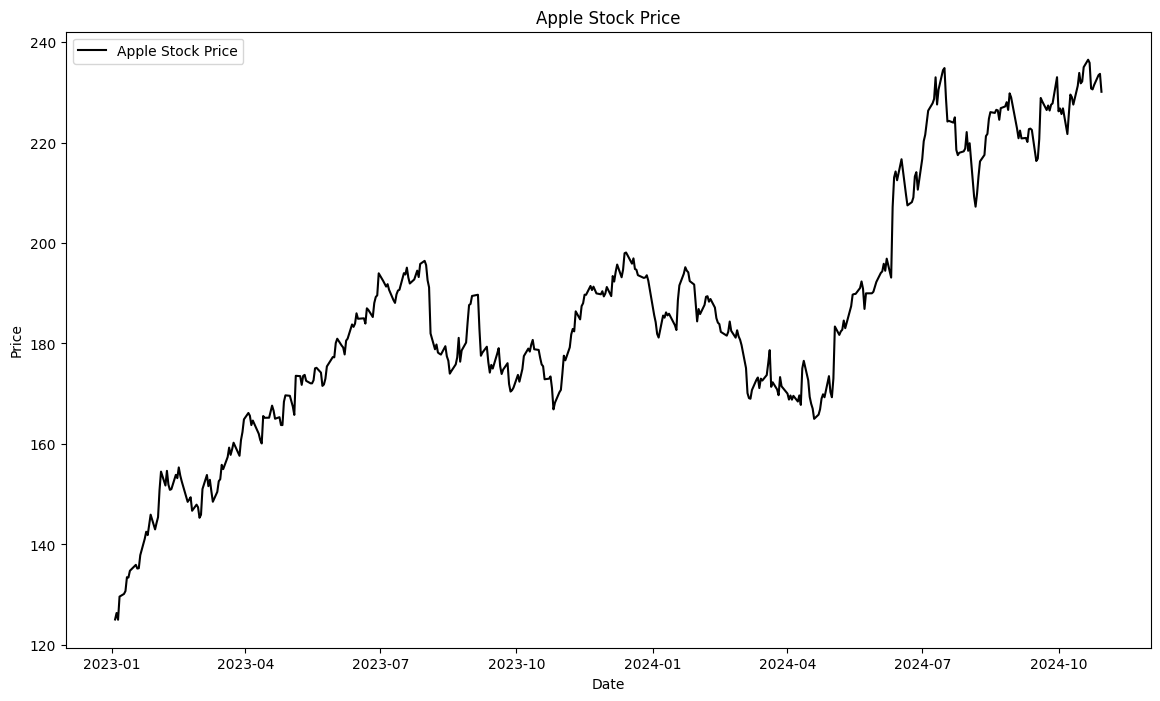

In [11]:
plt.figure(figsize=(14, 8))

# Plot Apple's Stock Price
plt.plot(data, label="Apple Stock Price", color='black')
plt.title("Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
#plt.grid(True)

#### Distribution of returns and Distribution of Log returns

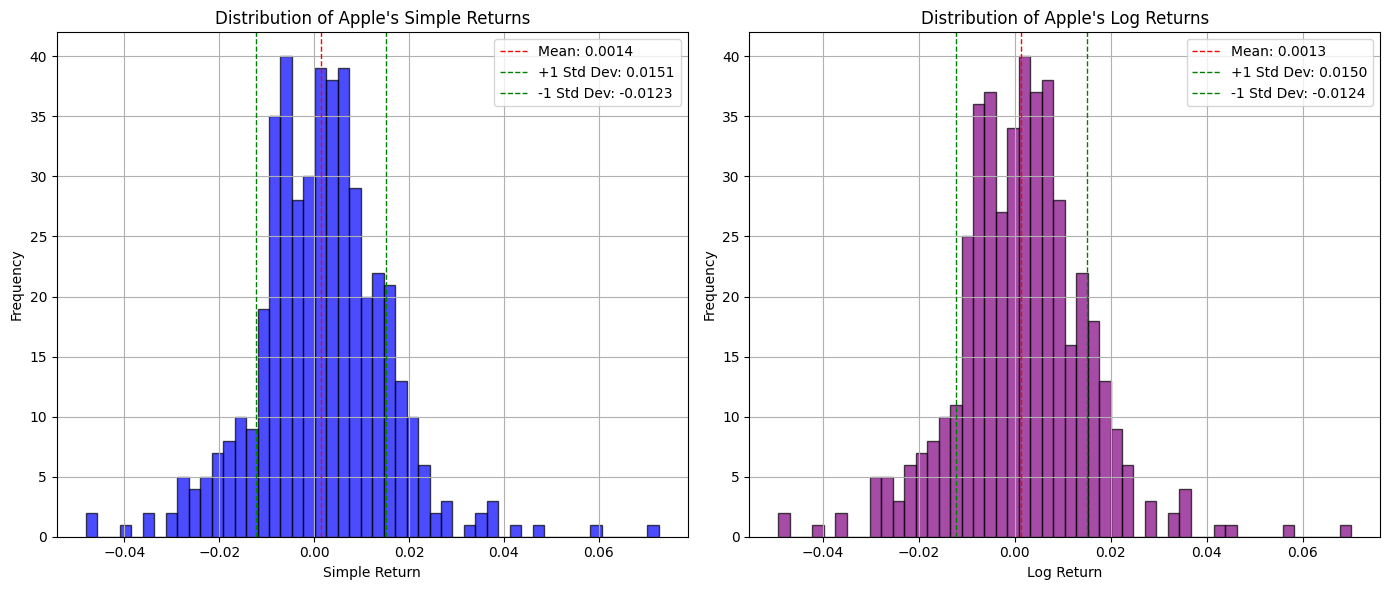

In [13]:
# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot histogram of simple returns
plt.subplot(1, 2, 1)
plt.hist(simple_returns, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Apple's Simple Returns")
plt.xlabel("Simple Return")
plt.ylabel("Frequency")
plt.grid(True)

# Show mean and standard deviation for simple returns
mean_simple_return = simple_returns.mean()
std_dev_simple_return = simple_returns.std()
plt.axvline(mean_simple_return, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_simple_return:.4f}')
plt.axvline(mean_simple_return + std_dev_simple_return, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_simple_return + std_dev_simple_return:.4f}')
plt.axvline(mean_simple_return - std_dev_simple_return, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_simple_return - std_dev_simple_return:.4f}')
plt.legend()

# Plot histogram of log returns
plt.subplot(1, 2, 2)
plt.hist(log_returns, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title("Distribution of Apple's Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.grid(True)

# Show mean and standard deviation for log returns
mean_log_return = log_returns.mean()
std_dev_log_return = log_returns.std()
plt.axvline(mean_log_return, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_log_return:.4f}')
plt.axvline(mean_log_return + std_dev_log_return, color='green', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_log_return + std_dev_log_return:.4f}')
plt.axvline(mean_log_return - std_dev_log_return, color='green', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_log_return - std_dev_log_return:.4f}')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Returns and Log Returns

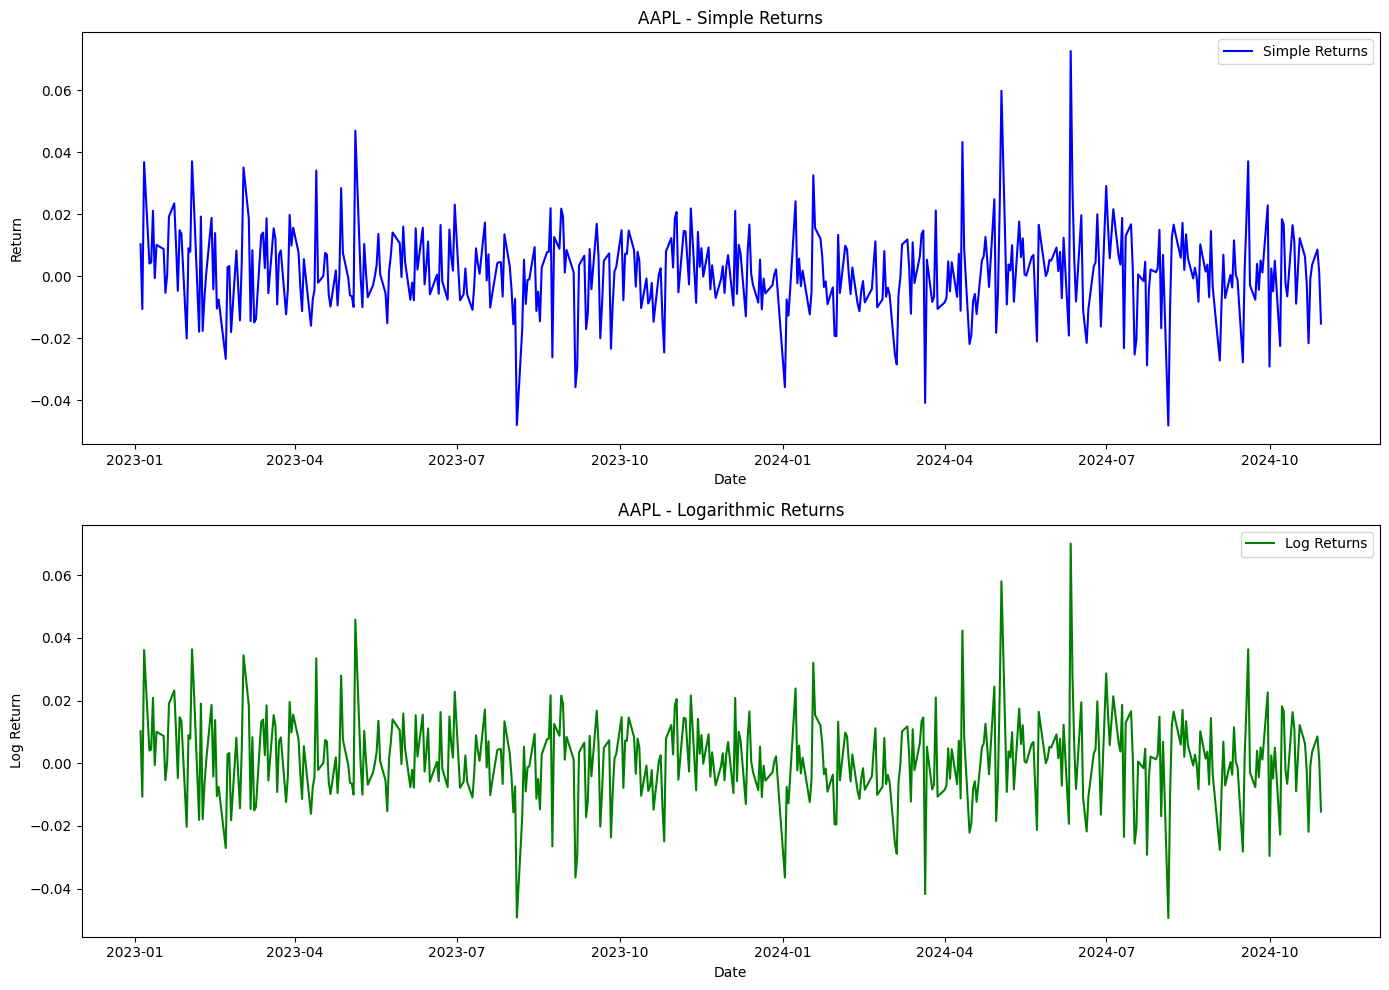

In [15]:
# Plotting
plt.figure(figsize=(14, 10))

# Plot Simple Returns
plt.subplot(2, 1, 1)
plt.plot(simple_returns, label="Simple Returns", color='blue')
plt.title(f"{ticker} - Simple Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
#plt.grid(True)

# Plot Log Returns
plt.subplot(2, 1, 2)
plt.plot(log_returns, label="Log Returns", color='green')
plt.title(f"{ticker} - Logarithmic Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

#### Volatility and Log Volatility Plot

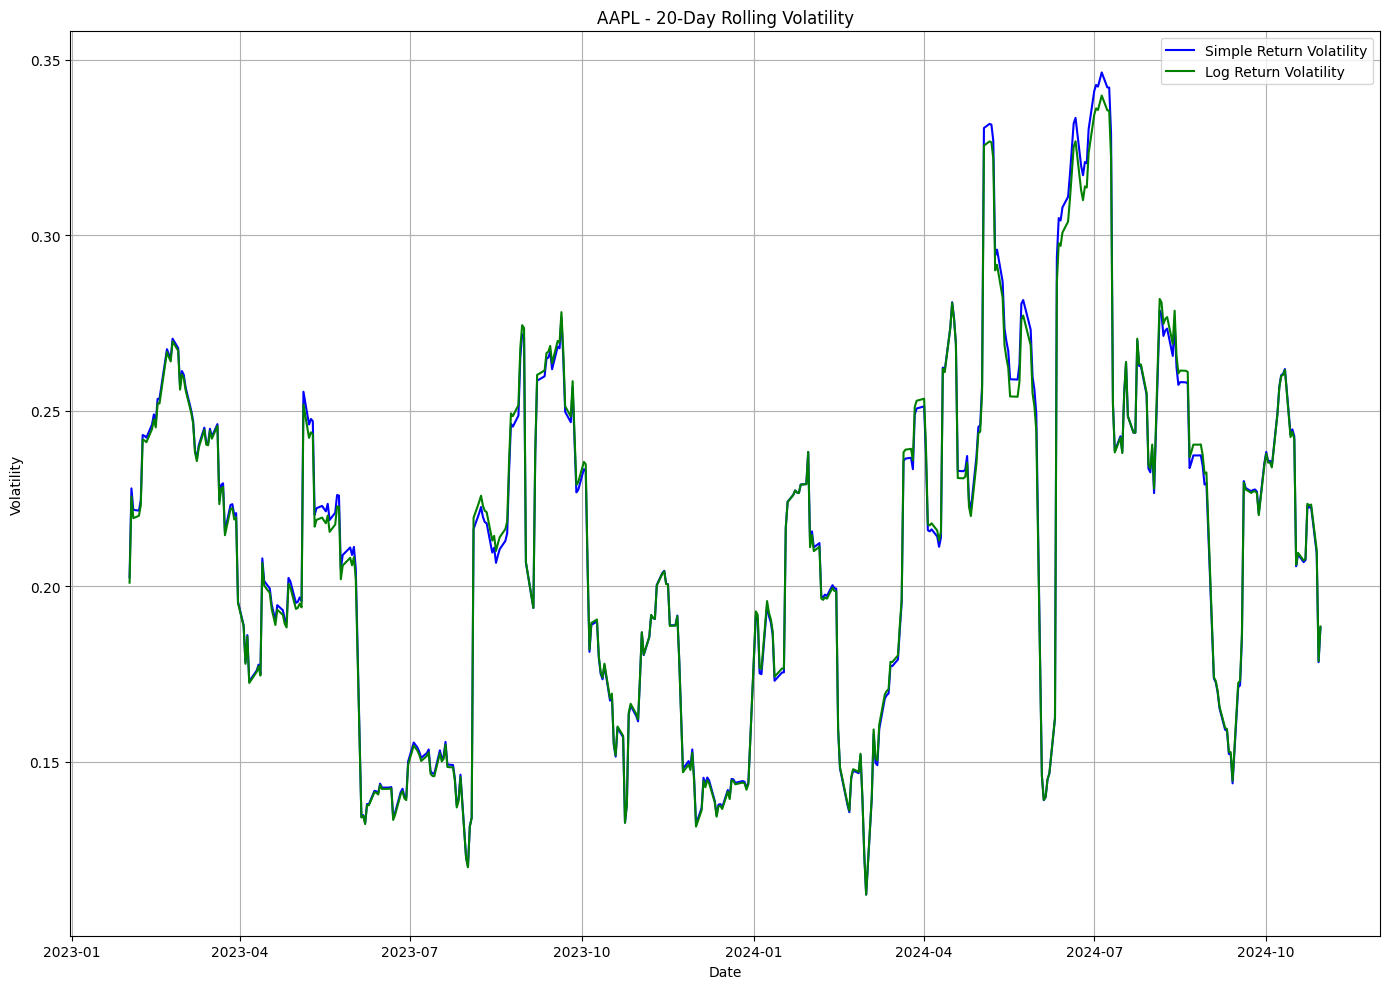

In [19]:
# Plot Volatility
plt.figure(figsize=(14, 10))
plt.plot(simple_volatility, label="Simple Return Volatility", color='blue')
plt.plot(log_volatility, label="Log Return Volatility", color='green')
plt.title(f"{ticker} - 20-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
